In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt




### Plot KL divergence

Text(0.5, 1.0, 'KL divergence over time')

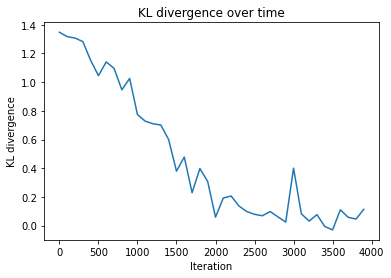

In [2]:
data_moons = np.load('./results/lsd_wrapper_grathwohlsample/moons/LSD_ckpt_3999.npz', allow_pickle=True)
list(data_moons)
metrics = data_moons['metrics']
metrics = metrics[np.newaxis][0]

freq = 100
niter = np.shape(metrics['kldiv'])[0]

x = np.arange(0, freq*niter, freq)
plt.plot(x, metrics['kldiv'])
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.title("KL divergence over time")

### Generate gif

In [ ]:
#https://www.blog.pythonlibrary.org/2021/06/23/creating-an-animated-gif-with-python/
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"))]
    frame_one = frames[0]
    frame_one.save("./results/lsd_wrapper_grathwohlsample/checkerboard/figs/animation.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [ ]:
make_gif("./results/lsd_wrapper_grathwohlsample/checkerboard/figs/")